#  <center>Markow链

##  <center>1. Markow链的定义和转移概率

定义1 随机过程 $\left\{X_n, n=0,1,2, \cdots\right\}$ 称为 Markov 链：  
①若它只取有限或可 列个值 (若不另外说明, 以非负整数集 $\{0,1,2, \cdots\}$ 来表示)  
②并且对任意的 $n \geqslant 0$, 及任意状态 $i, j, i_0, i_1, \cdots, i_{n-1}$, 有  
$$
\begin{aligned}
& P\left\{X_{n+1}=j \mid X_n=i, X_{n-1}=i_{n-1}, \cdots, X_1=i_1, X_0=i_0\right\} \\
= & P\left\{X_{n+1}=j \mid X_n=i\right\} 或 =  p_{ij}
\end{aligned}
$$

定义2 一步转移概率与转移矩阵：
$$
\begin{aligned}
& p_{ij}
= P\left\{X_{n+1}=j \mid X_n=i\right\} \\
& \boldsymbol{P}=\left(p_{i j}\right)=\left(\begin{array}{cccc}
p_{00} & p_{01} & p_{02} & \cdots \\
p_{10} & p_{11} & p_{12} & \cdots \\
\vdots & \vdots & \vdots & \\
p_{i 0} & p_{i 1} & p_{i 2} & \cdots \\
\vdots & \vdots & \vdots &
\end{array}\right) (p_{ij}\geqslant 0,i,j\in S; \sum_{j \in S}p_{ij} = 1,i\in S, S为状态空间 )
\end{aligned}
$$

定义3 n步转移概率与n步转移矩阵：
$$
\begin{aligned}
& p_{ij}^{(n)} = P\{X_{m+n} = j | X_{m} = i\} (i, j \in S; m\geqslant 0 ,n \geqslant 1) \\
& \boldsymbol{P^{(n)}}=\left(p_{i j}^{(n)}\right)
\end{aligned}
$$

定理1 C-K方程：
$$
\begin{aligned}
& p_{ij}^{(m+n)} = \sum_{k \in S} p_{ik}^{m} p_{kj}^{n} \\
& \boldsymbol{P^{(n)}}=  \boldsymbol{P^{(n)}} · \boldsymbol{P} =  \boldsymbol{P^{n}}
\end{aligned}
$$

例题1：甲乙两人进行某种比赛,设每局甲胜的概率是 $p$,乙胜的概率是 $q$, 和局的概率是$r, p+q+r=1$。设每局比赛后,胜者记“+ 1”分,负者记“- 1”分, 和局不记分, 且当两人中有一人获得2分时结束比赛。以 $X_n$ 表示比赛至第$n$局时甲获得的分数, 则 $\left\{X_n, n=0,1,2, \cdots\right\}$ 为时齐 Markov 链, 求在甲获得 1 分的情况下, 不超过两局可结束比赛的概率。

$X_n$的状态空间为$\{-2, -1, 0, 1, 2\}$, $X_n$的一步转移矩阵和二步转移矩阵为：

In [14]:
from sympy import symbols, Matrix
# Define the symbols
p, q, r = symbols('p q r')

# Define the matrix
A = Matrix([
    [1, 0, 0, 0, 0],
    [q, r, p, 0, 0],
    [0, q, r, p, 0],
    [0, 0, q, r, p],
    [0, 0, 0, 0, 1]])
print('一步转移矩阵:')
A

一步转移矩阵:


Matrix([
[1, 0, 0, 0, 0],
[q, r, p, 0, 0],
[0, q, r, p, 0],
[0, 0, q, r, p],
[0, 0, 0, 0, 1]])

In [15]:
# Compute the result
A2 = A * A
# Display the result
print('二步转移矩阵:')
A2

二步转移矩阵:


Matrix([
[      1,          0,            0,          0,       0],
[q*r + q, p*q + r**2,        2*p*r,       p**2,       0],
[   q**2,      2*q*r, 2*p*q + r**2,      2*p*r,    p**2],
[      0,       q**2,        2*q*r, p*q + r**2, p*r + p],
[      0,          0,            0,          0,       1]])

In [19]:
P_end = A2[1,2] + A2[1,-2] 
print('不超过两局可结束比赛的概率为')
P_end

不超过两局可结束比赛的概率为


p**2 + 2*p*r

Reference:  
Ross, S. M. (2006). Markov Chains. In Introduction to Probability Models (10th ed., pp. 192-204). Elsevier Science & Technology.  
张波, & 商豪. (2014). 应用随机过程(第三版). 中国人民大学出版社. (pp. 74-79)

---

##  <center>2. 状态的分类和性质

定义 1 称状态 $i$ 可达状态 $j(i, j \in S)$, 若存在 $n \geqslant 0$ 使得 $p_{i j}^{(n)}>0$, 记为 $i \rightarrow$ $j$ 。若同时有 $j \rightarrow i$, 则称 $i$ 与 $j$ 互通, 记为 $i \leftrightarrow j$ 。  
定理 1 互通是一种等价关系, 即满足:  
(1) 自返性: $i \leftrightarrow i$;  
(2) 对称性: $i \leftrightarrow j$, 则 $j \leftrightarrow i$;  
(3) 传递性: $i \leftrightarrow j, j \leftrightarrow k$, 则 $i \leftrightarrow k$ 。  

定义 2 对于任何状态 $i, j$, 以 $f_{i j}^{(n)}$ 记从 $i$ 出发经 $n$ 步后首次到达 $j$ 的概率, 则有  
$$
\begin{aligned}
& f_{i j}^{(0)}=p_{i j} \\
& f_{i j}^{(n)}=P\left\{X_n=j, X_k \neq j, k=1,2, \cdots, n-1 \mid X_0=i\right\}, n \geqslant 1
\end{aligned}
$$
令 $f_{i j}=\sum_{n=1}^{\infty} f_{i j}^{(n)}$, 若 $f_{i j}=1$, 称状态 $j$ 为常返状态; 若 $f_{j j}<1$, 称状态 $j$ 为非常返状态 或瞬过状态。  
定理 2 状态 $i$ 为常返的当且仅当 $\sum_{n=0}^{\infty} p_{i i}^{(n)}=\infty$; 状态 $i$ 为非常返状态时有 $\sum_{n=0}^{\infty} p_{i i}^{(n)}=\frac{1}{1-f_{i i}}$.  
定理 3 常返性是一个类性质，若 $i \leftrightarrow j$，则$i$,$j$同为常返态或非常返态。

Example 1 Consider the Markov chain having states $0,1,2,3,4$ and
$$
\mathbf{P}=\left\|\begin{array}{lllll}
\frac{1}{2} & \frac{1}{2} & 0 & 0 & 0 \\
\frac{1}{2} & \frac{1}{2} & 0 & 0 & 0 \\
0 & 0 & \frac{1}{2} & \frac{1}{2} & 0 \\
0 & 0 & \frac{1}{2} & \frac{1}{2} & 0 \\
\frac{1}{4} & \frac{1}{4} & 0 & 0 & \frac{1}{2}
\end{array}\right\|
$$
Determine the recurrent state.

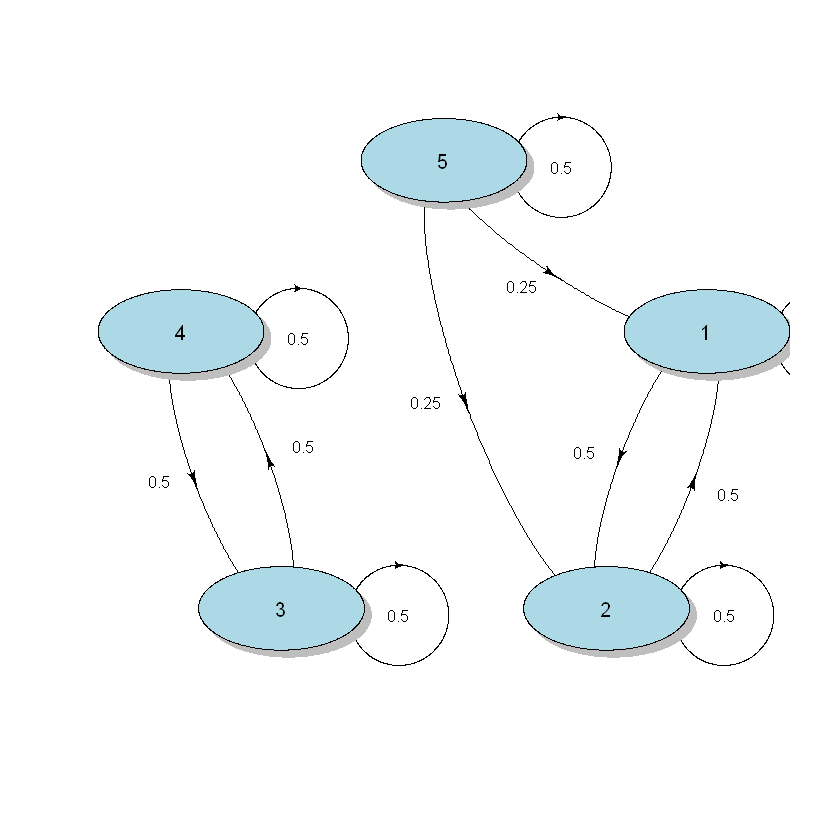

In [25]:
#install.packages("diagram")
#install.packages("expm")
#install.packages("markovchain")

#specifying transition probability matrix
library(shape)
tm<- matrix(c(0.5, 0.5, 0  , 0  , 0  , 
              0.5, 0.5, 0  , 0  , 0  ,
              0  , 0  , 0.5, 0.5, 0  ,
              0  , 0  , 0.5, 0.5, 0  ,
            0.25, 0.25, 0  , 0  , 0.5 
              ),
            nrow=5, ncol=5, byrow=TRUE)
#transposing transition probability matrix
tm.tr<- t(tm)
#plotting diagram
library(diagram)

plotmat(tm.tr, arr.length=0.3, arr.width=0.1,
        box.col="light blue", box.lwd=1, box.prop=0.5, box.size=0.12,
        box.type="circle", cex.txt=0.8, lwd=1, self.cex=0.6,
        self.shiftx=0.17, self.shifty=-0.01)

In [33]:
#creating Markov chain object
library(markovchain)
mc<- new("markovchain", transitionMatrix=tm, states=c("1","2", "3", "4", "5"))
#computing Markov chain characteristics
print('常返类和常返状态为：')
recurrentClasses(mc)
print('瞬时类和瞬时状态为：')
transientClasses(mc)

[1] "常返类和常返状态为："


[[1]]
[1] "1" "2"

[[2]]
[1] "3" "4"

[1] "瞬时类和瞬时状态为："


[[1]]
[1] "5"